## Importing the Libraries

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Live.csv')

### Checking for null values

In [148]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [149]:
dataset.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


## Data Preprocessing

### `Column1`, `Column2`, `Column3`, and `Column4` contain no values so we will drop those
### We will also drop `status_id` and `status_published` as this is irrelevant


In [150]:
dataset = dataset.drop(['status_id', 'status_published', 'Column1', 'Column2', 'Column3', 'Column4'], axis=1)

In [151]:
dataset.head()


,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


## Next we will encode our object variables which is `status_type`

In [152]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
dataset['status_type'] = LE.fit_transform(dataset['status_type'])

In [153]:
dataset.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


## Creating a train and test set as well as scaling the data

In [154]:
x = dataset.drop('status_type', axis=1)
y = dataset[['status_type']]

In [155]:
dataset.status_type.value_counts()

1    4288
3    2334
2     365
0      63
Name: status_type, dtype: int64

In [156]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [157]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## K elbow using sklearn

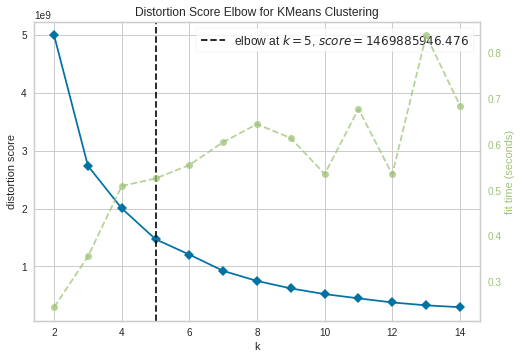

In [158]:
from yellowbrick.base import Visualizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

km = KMeans(random_state=1)
vis = KElbowVisualizer(km, k=(2,15))
vis.fit(x)
vis.show()
plt.show()

## Calculate Silhouette Coefficient
### Worst Case -1
### Optimal Case +1

In [159]:
km = KMeans(n_clusters=4, random_state=1)
y_pred = km.fit_predict(x)
x['cluster'] = y_pred
x.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
0,529,512,262,432,92,3,1,1,0,0
1,150,0,0,150,0,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0,0
3,111,0,0,111,0,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0,0


In [160]:
from sklearn import metrics
sil_avg = metrics.silhouette_score(y, y_pred)
print("Silhoutte Coefficient is:" , sil_avg)

Silhoutte Coefficient is: -0.16508013599852575


## Visualizing Clusters for `num_reactions` and `num_likes`

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


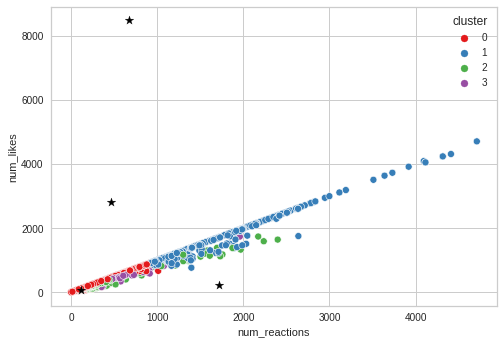

In [161]:
sns.scatterplot('num_reactions', 'num_likes', data=x, hue=x['cluster'], palette='Set1', legend='full')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='*', s=80, c='black')